# General EDA

## Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('kc_house_data.csv', index_col='id')

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Let's drop redundant columns sqft_living and lot

In [6]:
df.drop(columns= ['sqft_living15','sqft_lot15'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
dtypes: float64(6), int64(11), object(1)
memory usage: 3.1+ MB


In [9]:
df.date =df.date.apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:8])
df.date =pd.to_datetime(df.date)

In [10]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [22]:
df.grade.value_counts()

### Sales over the year

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [12]:
print(df.date.max())
print(df.date.min())

2015-05-27 00:00:00
2014-05-02 00:00:00


## Look at Distributions

In [13]:
price_predictors = df.iloc[:,2:]

In [17]:
price_predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

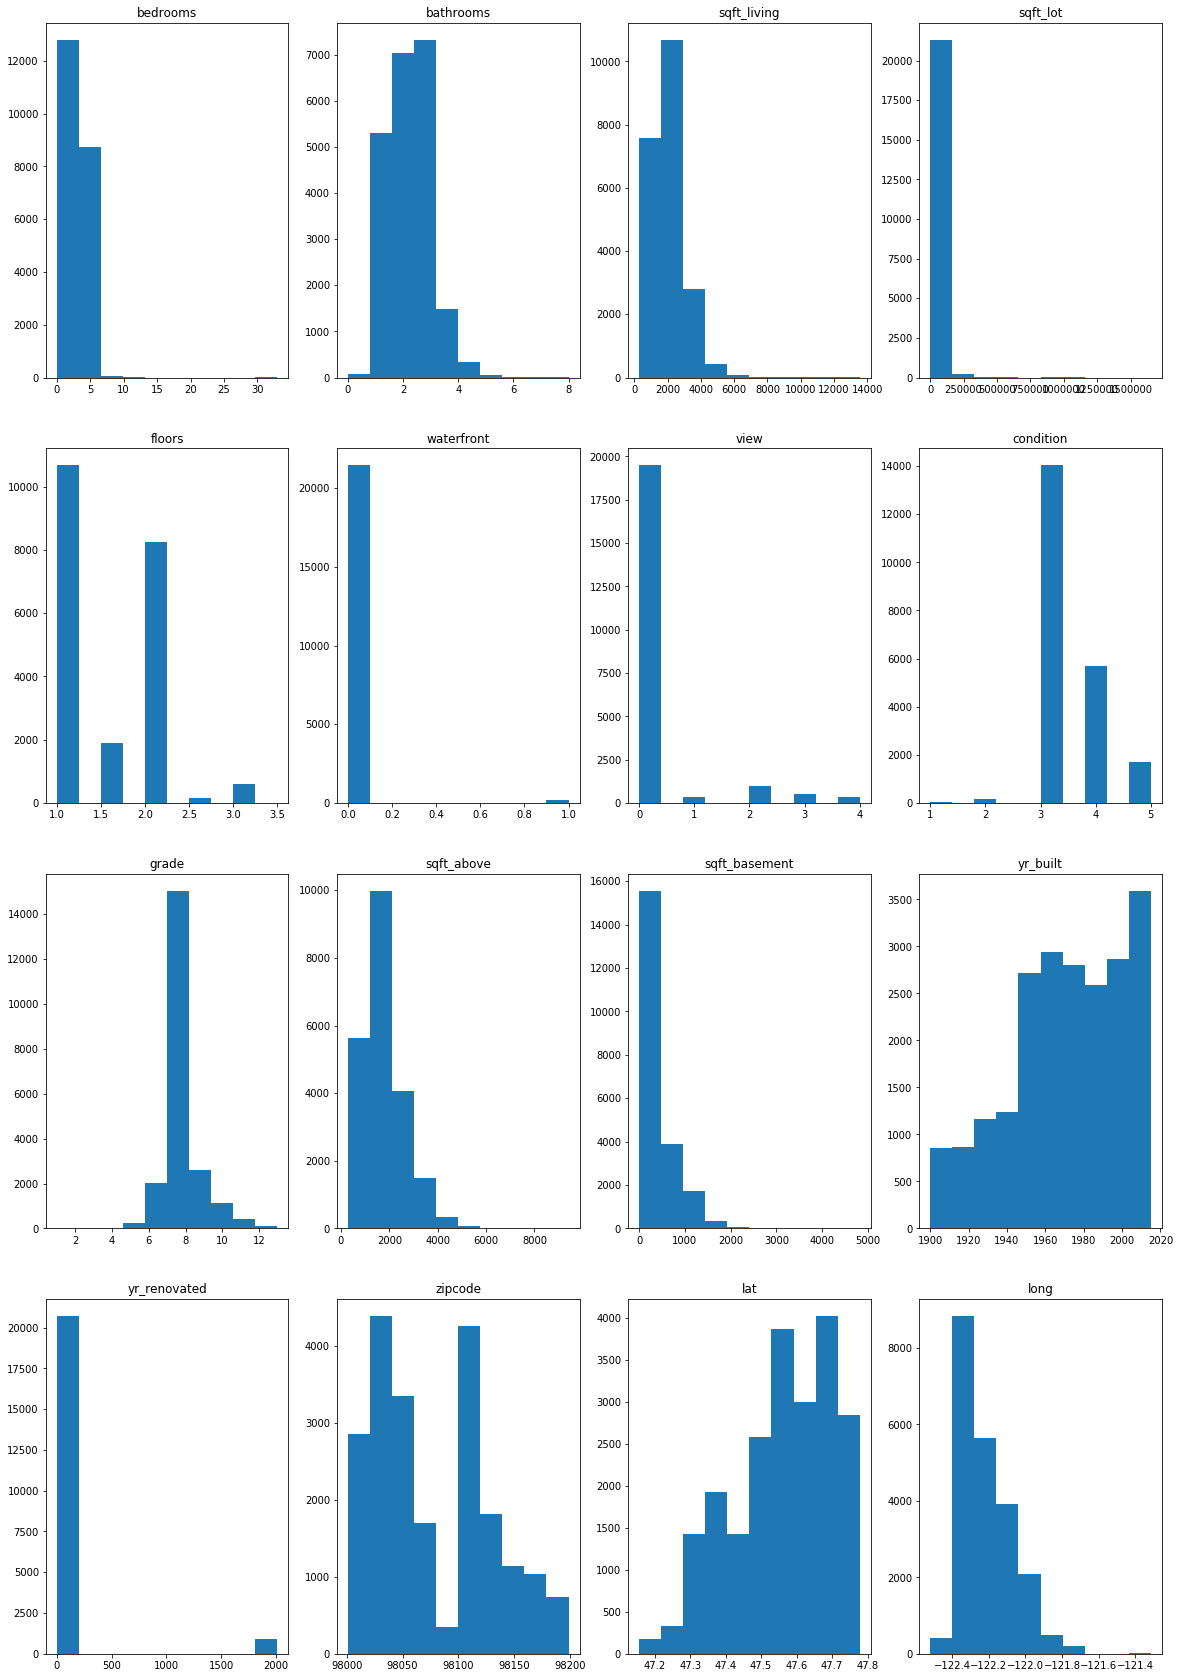

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,30))
# fig.suptitle('Graphs of Feature Distributions')
# n =1 #used for iteration below, DONT NEED IF USING np.ravel

# for row in range(3):
#     for col in range(4):
# to avoid row col nonsense  use below
list_of_subplots = np.ravel(axes)

for index,col in enumerate(price_predictors.columns):
# ax = axes[row][col]
# y = [n*xi for xi in x]
    list_of_subplots[index].hist(price_predictors[col])
    list_of_subplots[index].set_title('{}'.format(col))
fig.savefig('dist_of_features')    #saves fig in current folder

## Look at correlation

In [19]:
price_predictors = df.iloc[:,2:]
corr = price_predictors.corr()

### Function to color corr dataframe

In [29]:
# color green if above .7 coor and red if above -.7 corr
def color(val):
    if abs(val)>+.7:
        color = 'green'
        return 'color: %s' % color
    elif val<0:
        color ='red'
        return 'color: %s' % color 
    else:
        color ='black'
        return 'color: %s' % color

In [30]:
s = corr.style.applymap(color)
s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
bedrooms,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.477616,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473
bathrooms,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685363,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876644,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223
sqft_lot,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183511,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521
floors,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523899,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419
waterfront,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720741,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102
view,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167648,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997
condition,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158206,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.0827749,0.251321,-0.144674,1,0.755924,0.168392,0.446963,0.0144143,-0.184862,0.114084,0.198372
sqft_above,0.477616,0.685363,0.876644,0.183511,0.523899,0.0720741,0.167648,-0.158206,0.755924,1,-0.0519757,0.423915,0.0232834,-0.261192,-0.000809728,0.3438


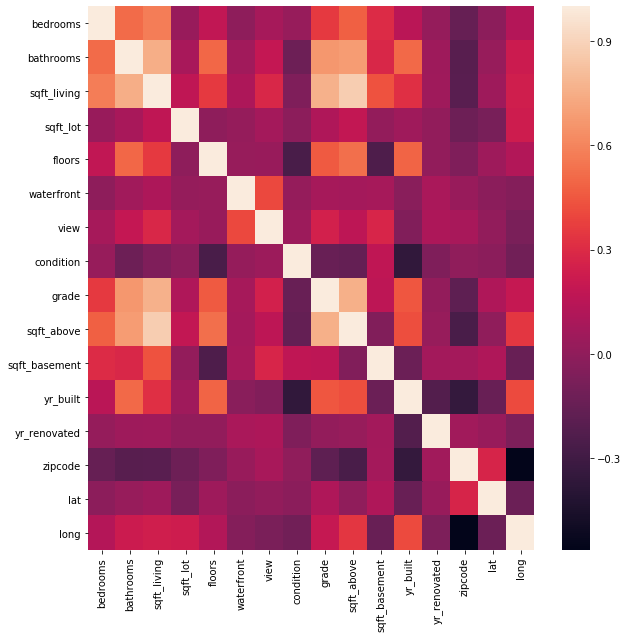

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

## Run prliminary OLS

In [32]:
ols_formula ='price~'+'+'.join(price_predictors.columns)

In [33]:
simple_reg = ols(formula=ols_formula,data=df).fit()
simple_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3341.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:21:32   Log-Likelihood:            -2.9461e+05
No. Observations:               21611   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.357e+06   2.88e+06      3.244      0.001     3.7e+06     1.5e+07
bedrooms      -3.549e+04   1892.705    -18.753      0.000   -3.92e+04   -3.18e+04
bathrooms      4.098e+04   3255.851     12.587      0.000    3.46e+04    4.74e+04
sqft_living     114.6229      2.133     53.738      0.000     110.442     118.804
sqft_lot         -0.0529      0.035     -1.522      0.128      -0.121       0.015
floors         4901.2596   3575.760      1.371      0.170   -2107.493    1.19e+04
waterfront      5.79e+05   1.74e+04     33.318      0.000    5.45e+05    6.13e+05
view           5.485e+04   2116.319     25.915      0.000    5.07e+04     5.9e+04
condition      2.561e+04   2352.873     10.883      0.000     2.1e+04    3.02e+04
grade          9.988e+04   2065.907     48.347      0.000    9.58e+04    1.04e+05
sqft_above       74.5506      2.142     34.808      0.000      70.353      78.749
sqft_basement    40.0719      2.650     15.122      0.000      34.878      45.266
yr_built      -2638.6699     72.730    -36.280      0.000   -2781.227   -2496.113
yr_renovated     18.3563      3.655      5.022      0.000      11.191      25.521
zipcode        -602.9676     32.888    -18.334      0.000    -667.430    -538.506
lat            6.073e+05   1.07e+04     56.573      0.000    5.86e+05    6.28e+05
long          -2.079e+05   1.29e+04    -16.060      0.000   -2.33e+05   -1.83e+05
==============================================================================
Omnibus:                    18125.176   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1752491.532
Skew:                           3.499   Prob(JB):                         0.00
Kurtosis:                      46.557   Cond. No.                     1.13e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""